# WAZE CHURN PROJECT

# Understanding and analysing data 


In [3]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

In [4]:
# Load dataset into dataframe
df = pd.read_csv('waze_dataset.csv')

In [5]:
# View Data
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [7]:
#checking parameters and statistics for null rows
null_df = df[df['label'].isnull()]
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [8]:
#checking parameters and statistics for not null rows
not_null_df = df[~df['label'].isnull()]
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [9]:
#checking the device ratios for both null and not-null values
null_df.groupby('device').size()

device
Android    253
iPhone     447
dtype: int64

In [10]:
null_df['device'].value_counts(normalize=True)

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

In [11]:
not_null_df.groupby('device').size()

device
Android    5074
iPhone     9225
dtype: int64

In [12]:
not_null_df['device'].value_counts(normalize=True)

device
iPhone     0.64515
Android    0.35485
Name: proportion, dtype: float64

### Ratio of devices for both null and not_null is same

In [14]:
#checking the ratio of churned to retained in the data set
print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True)) # Ratio is 825 TO 18%

label
retained    11763
churned      2536
Name: count, dtype: int64

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


In [15]:
# checking the median for both churned and retained
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


In [16]:
df['km_per_drive'] = df['driven_km_drives']/df['drives']
df.groupby('label').median(numeric_only=True)[['km_per_drive']]

,km_per_drive
label,
churned,74.109416
retained,75.014702


The median retained user drove about one more kilometer per drive than the median churned user.

In [18]:
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']
df.groupby('label').median(numeric_only=True)[['km_per_driving_day']]

,km_per_driving_day
label,
churned,697.541999
retained,289.549333


In [19]:
# Now calculate the median number of drives per driving day for each group.
df['drives_per_driving_day'] = df['drives']/df['driving_days']
df.groupby('label').median(numeric_only=True)[['drives_per_driving_day']]

,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


The median user who churned drove 698 kilometers each day they drove last month, which is ~240% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data&mdash;and in particular the sample of churned users&mdash;contains a high proportion of long-haul truckers.

In consideration of how much these users drive, it would be worthwhile to recommend that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

In [21]:
# For each label, calculate the number of Android users and iPhone users
df.groupby(['label','device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [22]:
## For each label, calculate the percentage of Android users and iPhone users
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

1. The dataset has 700 missing values in the `label` column. There was no obvious pattern to the missing values.

2. Mean is subject to the influence of outliers, while the median represents the middle value of the distribution regardless of any outlying values.

3. The median user who churned drove 698 kilometers each day they drove last month, which is about 240% the per-drive-day distance of retained users. It would be helpful to know how this data was collected and if it represents a non-random sample of users.

4. Android users comprised approximately 36% of the sample, while iPhone users made up about 64%

5. Generally, users who churned drove farther and longer in fewer days than retained users. They also used the app about half as many times as retained users over the same period.

6. The churn rate for both iPhone and Android users was within one percentage point of each other. There is nothing suggestive of churn being correlated with device.

In [25]:
# Import packages for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns

CHECKING AND DEALING WITH OUTLIERS

There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. 

Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.

Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.

Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

# Visualising and Interpretting all columns

In [28]:
# histogram function for all the columns
def histogrammer(column_name,**kwargs):

    plt.figure(figsize=(5,4))
    sns.histplot(df[column_name],**kwargs)
    median = df[column_name].median()
    plt.axvline(median,color='red',linestyle='--',label=f'median: {median:.2f}')
    plt.title(f'{column_name} Histogram')
    plt.legend()   

#boxplot function for all the columns
def boxplotter(column_name):
    plt.figure(figsize=(5,1))
    sns.boxplot(x=df[column_name],fliersize=1)
    plt.title(f'{column_name} Boxplot');

#### **`sessions`**

_The number of occurrences of a user opening the app during the month_

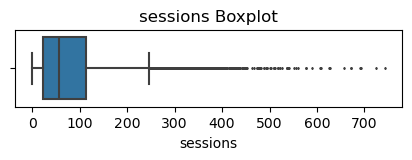

In [30]:
boxplotter('sessions')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


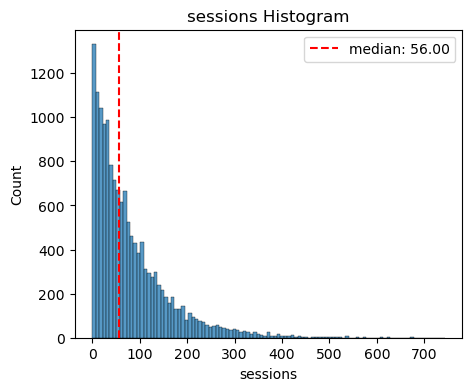

In [31]:
histogrammer('sessions')

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

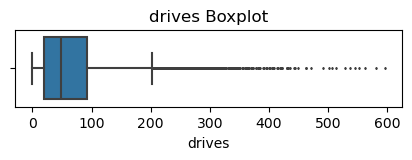

In [34]:
boxplotter('drives')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


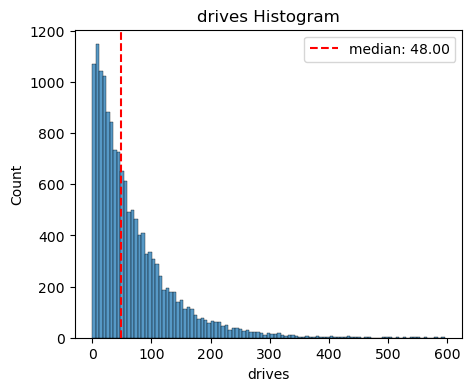

In [35]:
histogrammer('drives')

The `drives` variable is a right-skewed distribution with half of the observations having 48 or fewer sessions. However, as indicated by the boxplot, some users have more than 500.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

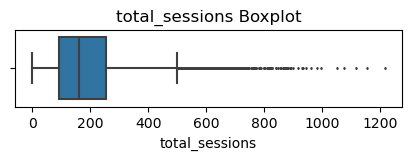

In [38]:
boxplotter('total_sessions')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


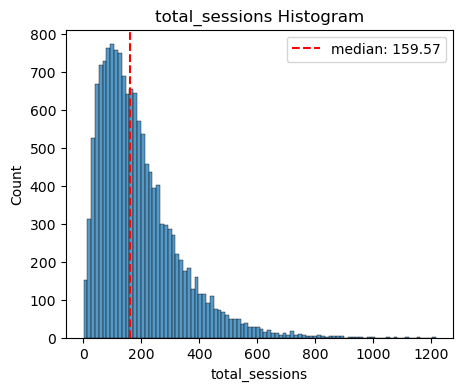

In [39]:
histogrammer('total_sessions')

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. The median number of sessions in the last month was 56 and the median total sessions was 159.57, then it seems that a large proportion of a user's (estimated) total drives might have taken place in the last month.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

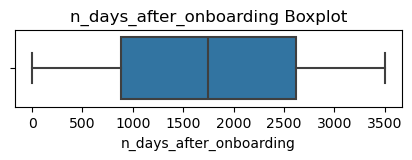

In [42]:
boxplotter('n_days_after_onboarding')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


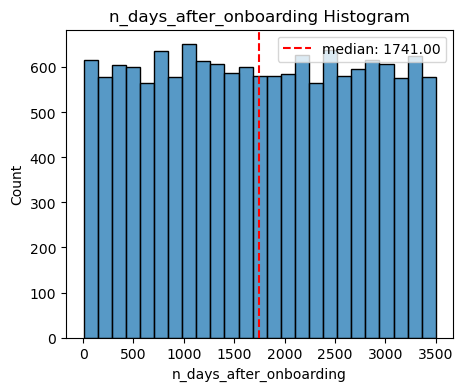

In [43]:
histogrammer('n_days_after_onboarding')

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

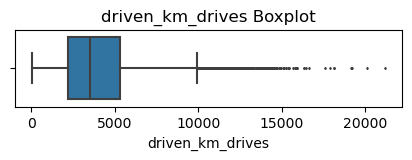

In [46]:
boxplotter('driven_km_drives')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


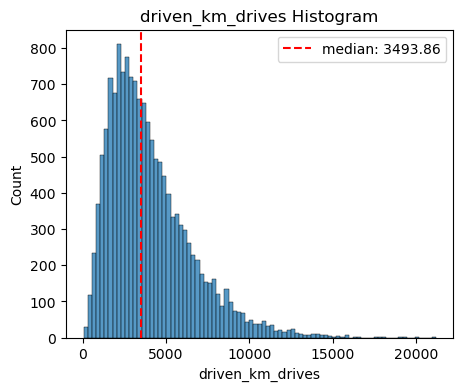

In [47]:
histogrammer('driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

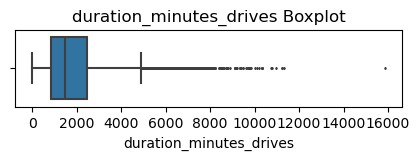

In [50]:
boxplotter('duration_minutes_drives')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


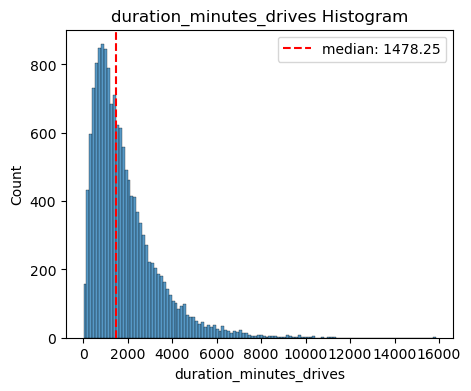

In [51]:
histogrammer('duration_minutes_drives')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

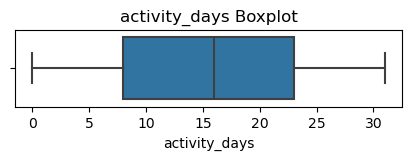

In [54]:
boxplotter('activity_days')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


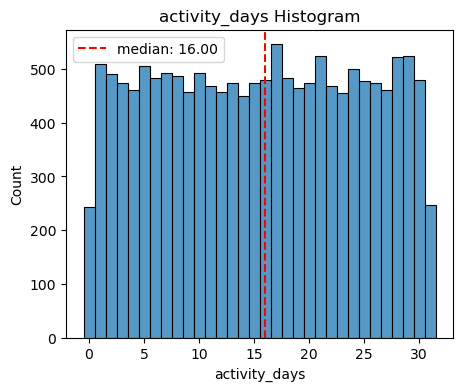

In [55]:
histogrammer('activity_days',discrete=True)
#The discrete function treats the data as distinct, separate categories or integers instead of putting them in bins

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which I thought would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

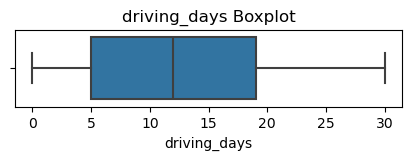

In [58]:
boxplotter('driving_days')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


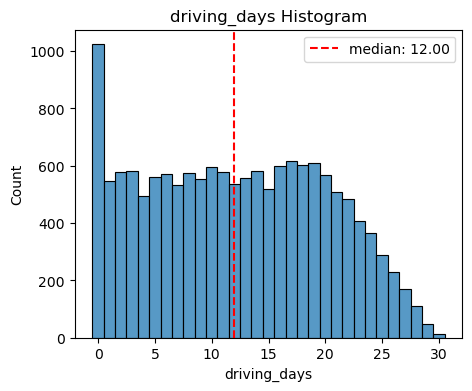

In [59]:
histogrammer('driving_days',discrete=True)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so a pie chart is better.

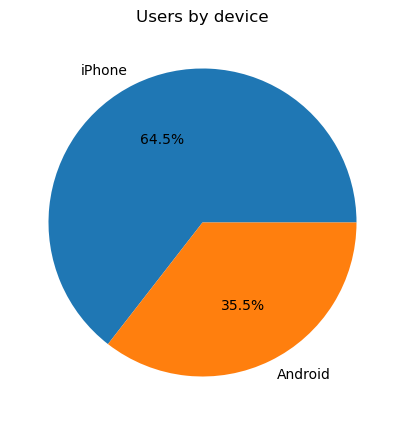

In [62]:
# pie chart
fig = plt.figure(figsize=(5,5))
data1=df['device'].value_counts()
plt.pie(data1, labels=data1.index, autopct='%1.1f%%')
plt.title('Users by device');

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

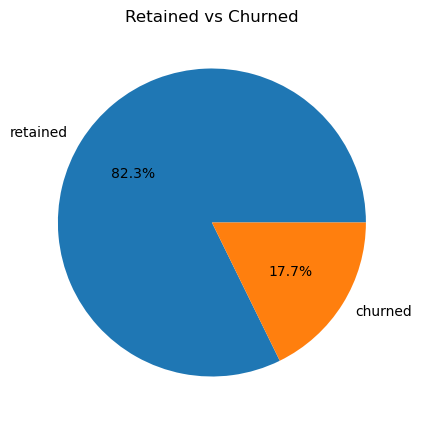

In [65]:
# pie chart
fig = plt.figure(figsize=(5,5))
data1=df['label'].value_counts()
plt.pie(data1, labels=data1.index, autopct='%1.1f%%')
plt.title('Retained vs Churned');

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related.

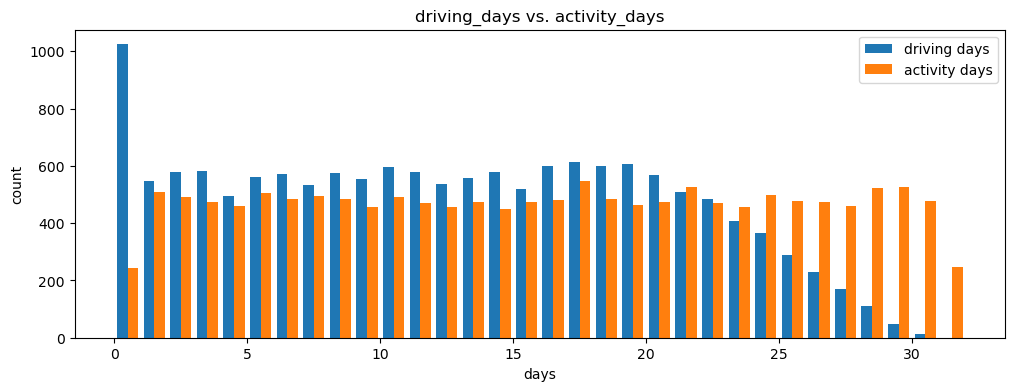

In [68]:
#histogram for driving_days and activity_days
fig = plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'],df['activity_days']],bins=range(0,33),label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.It seems that the number of days in the month is not the same between variables.

In [70]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

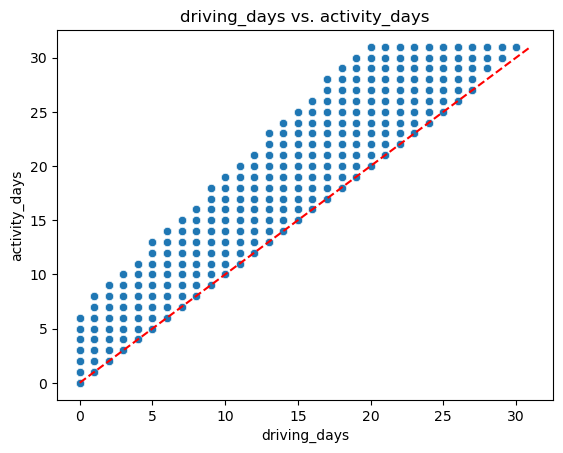

In [72]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

#### **Retention by device**

To show how many iPhone users were retained/churned and how many Android users were retained/churned.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


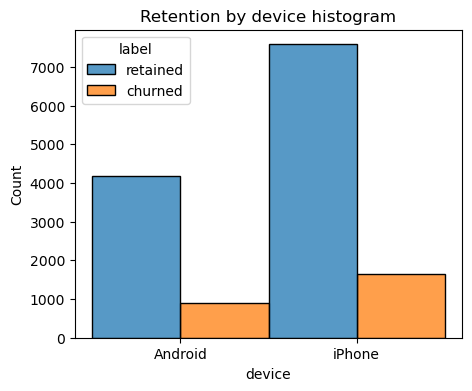

In [74]:
#histogram on the basis of device and label
fig = plt.figure(figsize=(5,4))
sns.histplot(data=df,x='device',hue='label',multiple='dodge')
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**
The median distance driven per driving day last month for users who churned was 608.78 km, versus 247.48 km for people who did not churn.

In [77]:
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [78]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


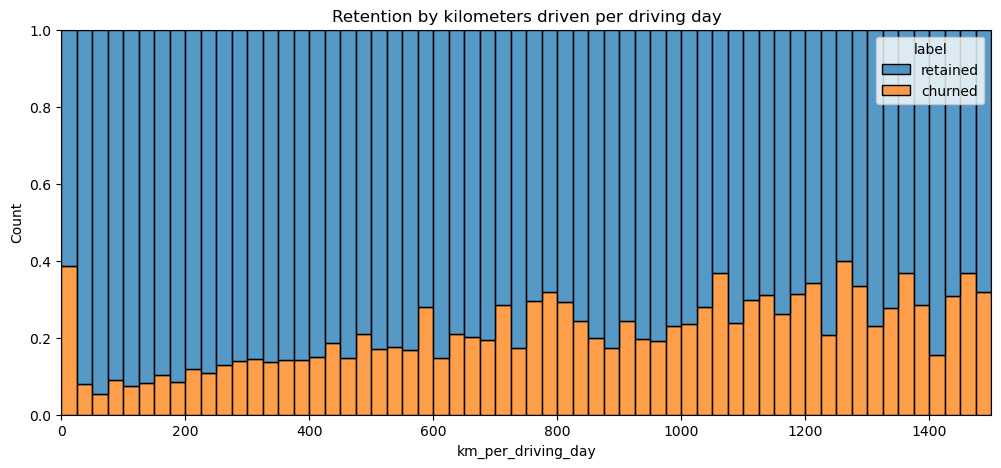

In [79]:
#histogram on the basis of device and label
#No one can drive more than 1200-1500km in a day
fig = plt.figure(figsize=(12,5))
sns.histplot(data=df,x='km_per_driving_day',hue='label',bins=range(0,1501,25),multiple='fill')
plt.title('Retention by kilometers driven per driving day');

The churn rate tends to increase as the mean daily distance driven increases

#### **Churn rate per number of driving days**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


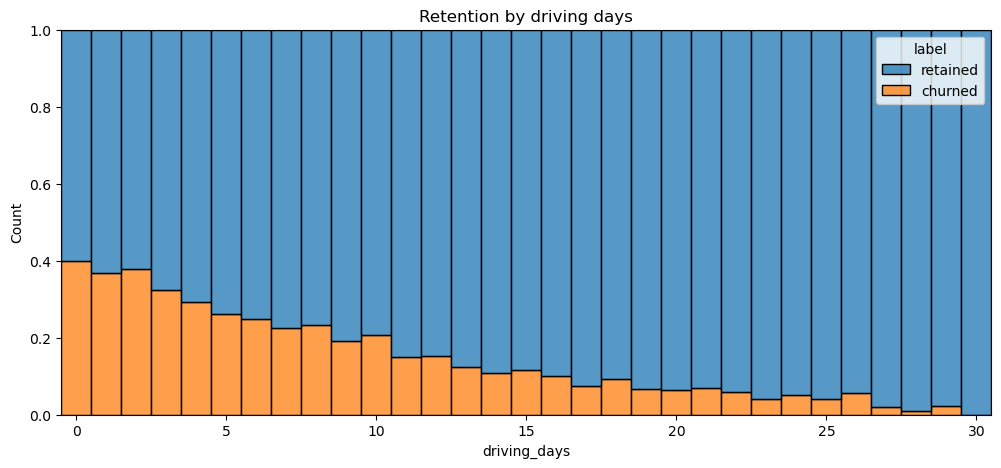

In [82]:
# Histogram
fig = plt.figure(figsize=(12,5))
sns.histplot(data=df,x='driving_days',hue='label',bins=range(1,32),multiple='fill',discrete=True)
plt.title('Retention by driving days');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

In [85]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
df['percent_sessions_in_last_month'].median()

0.42309702992763176

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='percent_sessions_in_last_month', ylabel='Count'>

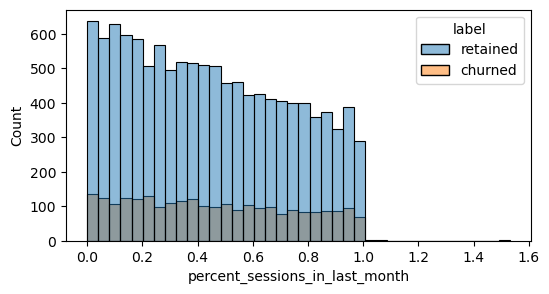

In [86]:
# Histogram
fig = plt.figure(figsize=(6,3))
sns.histplot(data=df, x='percent_sessions_in_last_month',hue='label',multiple='layer')

In [87]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


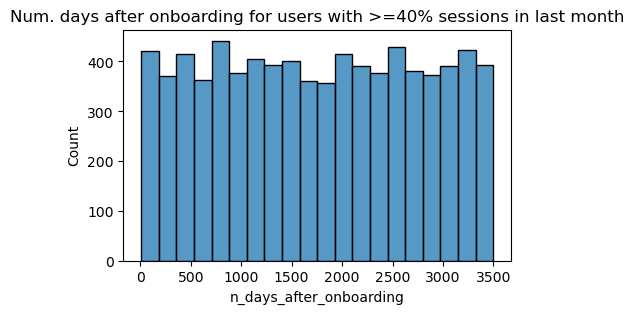

In [89]:
# Histogram
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution.Most of the users used the app in the last month and not over a span of 5 years

# Dealing with Outliers 

In [92]:
#function that calculates the 95th percentile of a given column,
#then imputes values > the 95th percentile with the value at the 95th percentile
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [93]:
for column in ['sessions', 'drives', 'total_sessions','total_navigations_fav2',
               'total_navigations_fav1','driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
   total_navigations_fav2 | percentile: 0.95 | threshold: 124.0
   total_navigations_fav1 | percentile: 0.95 | threshold: 424.0
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [94]:
#Rechecking if Imputation worked
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000,1.499200e+04,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,114.415228,27.214281,3939.632764,1789.647426,15.537102,12.179879,inf,578.963113,inf,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,124.686795,36.735583,2216.041510,1222.705167,9.004655,7.824036,NaN,1030.094384,NaN,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.008775e+00,0.000000,0.000000e+00,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,3.323065e+01,136.238895,1.800000e+00,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,7.488006e+01,272.889272,4.666667e+00,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,1.854667e+02,558.686918,1.216667e+01,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,424.000000,124.000000,8889.794236,4668.899349,31.000000,30.000000,inf,15420.234110,inf,1.530637


## Factors correlated with user churn.

Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.

# Data exploration and hypothesis testing

In [97]:
#Import packages
from scipy import stats

In [98]:
# 1. Create `map_dictionary`
map_dictionary = {'Android': 2, 'iPhone': 1}

# 2. Create new `device_type` column
df['device_type'] = df['device']

# 3. Map the new column to the dictionary
df['device_type'] = df['device_type'].map(map_dictionary)

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

In [99]:
df.groupby('device_type')['drives'].mean()

device_type
1    64.446340
2    63.353482
Name: drives, dtype: float64

Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically conduct a hypothesis test.

**Hypotheses:**

$H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

$H_A$: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

In [102]:
#Performing t-test
iPhone = df[df['device_type']==1]['drives']

Android = df[df['device_type']==2]['drives']

stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

TtestResult(statistic=1.1643714136026293, pvalue=0.24429844267242223, df=11148.669519764011)

Since the p-value is larger than the chosen significance level (5%), I fail to reject the null hypothesis. I conclude that there is **no** statistically significant difference in the average number of drives between drivers who use iPhones and drivers who use Androids.

The key business insight is that drivers who use iPhone devices on average have a similar number of drives as those who use Androids.

# Regression modeling

In [106]:
# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [107]:
df = df.drop('ID',axis=1)
df

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,device_type
0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.953670,2
1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.406856,1
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.841186,2
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,0.724968,1
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,0.499266,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,52.554489,170.029229,3.235294,0.288634,1
14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,116.073577,203.128760,1.750000,0.223797,2
14996,retained,243,201,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,14.145320,182.225002,12.882353,0.646893,1
14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,33.764655,675.293092,20.000000,0.825374,1


# Feature Engineering

#### km_per_driving_day


In [110]:
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### professional_driver

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

In [112]:
df['professional_driver']=((df['drives'] >= 60) & (df['driving_days'] >= 15)).astype(int)

In [113]:
df['professional_driver'].value_counts()

professional_driver
0    12405
1     2594
Name: count, dtype: int64

In [114]:
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

In [115]:
# Drop rows with missing data in `label` column
df = df.dropna(subset=['label'])

#### Label 2 
Categorical for label column in data set

In [117]:
#creating label-2 from label which is a non-categorical column
df['label2'] = df['label'].replace({'churned': 1, 'retained': 0})

/var/folders/_b/hgv3srfd2z1d6sw190wtt1340000gp/T/ipykernel_22992/2421612028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label2'] = df['label'].replace({'churned': 1, 'retained': 0})


#### total_sessions_per_day

New column that represents the mean number of sessions per day _since onboarding_.

In [119]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

/var/folders/_b/hgv3srfd2z1d6sw190wtt1340000gp/T/ipykernel_22992/1086446842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']


#### km_per_hour
New column representing the mean kilometers per hour driven in the last month.

In [121]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)

/var/folders/_b/hgv3srfd2z1d6sw190wtt1340000gp/T/ipykernel_22992/406424026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)


#### percent_of_sessions_to_favorite

New column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places.

This is a proxy representation for the percent of overall drives that are to a favorite place. Since total drives since onboarding are not contained in this dataset, total sessions must serve as a reasonable approximation.

People whose drives to non-favorite places make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.

In [123]:
# Create `percent_of_sessions_to_favorite` feature
df['percent_of_drives_to_favorite'] = (
    df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']

/var/folders/_b/hgv3srfd2z1d6sw190wtt1340000gp/T/ipykernel_22992/2553668639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percent_of_drives_to_favorite'] = (


# Determine whether assumptions have been met for Logistic Regression

#### Collinearity

In [126]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

#generating correlation matrix
numeric_df.corr(method='pearson')

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,device_type,professional_driver,label2,total_sessions_per_day,km_per_hour,percent_of_drives_to_favorite
sessions,1.000000,0.996938,0.597299,0.007101,0.001854,0.008536,0.002995,-0.004545,0.025113,0.020294,-0.321676,-0.011569,0.454513,0.614136,-0.012704,0.443654,0.034911,0.079240,0.006515,-0.102835
drives,0.996938,1.000000,0.595615,0.006949,0.001012,0.009510,0.003455,-0.003884,0.024347,0.019603,-0.325029,-0.010972,0.456048,0.613972,-0.011695,0.443997,0.035943,0.078286,0.005703,-0.103468
total_sessions,0.597299,0.595615,1.000000,0.006615,0.000188,0.010363,0.001015,-0.000344,0.015757,0.012957,-0.194402,-0.016162,0.274758,-0.113455,-0.012133,0.254532,0.024568,0.152819,0.003191,-0.150742
n_days_after_onboarding,0.007101,0.006949,0.006615,1.000000,-0.002483,-0.004968,-0.004655,-0.010167,-0.009418,-0.007321,0.004168,0.011764,-0.002340,-0.000874,0.011299,0.003770,-0.129263,-0.302657,0.010628,-0.008151
total_navigations_fav1,0.001854,0.001012,0.000188,-0.002483,1.000000,0.002853,-0.007321,0.005686,0.010896,0.010406,-0.005227,-0.000160,0.009050,0.015183,0.001266,-0.000206,0.052389,-0.002523,-0.011890,0.173140
total_navigations_fav2,0.008536,0.009510,0.010363,-0.004968,0.002853,1.000000,0.003567,-0.003008,-0.004425,0.002000,0.002902,0.006751,0.002379,0.000603,0.000275,0.007126,0.015032,-0.000963,0.008738,0.031414
driven_km_drives,0.002995,0.003455,0.001015,-0.004655,-0.007321,0.003567,1.000000,0.690554,-0.007445,-0.009550,0.227341,0.344765,0.013289,-0.002088,0.002086,-0.000901,0.019771,0.014415,0.095457,-0.005799
duration_minutes_drives,-0.004545,-0.003884,-0.000344,-0.010167,0.005686,-0.003008,0.690554,1.000000,-0.007894,-0.009425,0.170694,0.239630,0.003929,-0.007883,0.007708,-0.012127,0.040406,0.010028,-0.256993,-0.001296
activity_days,0.025113,0.024347,0.015757,-0.009418,0.010896,-0.004425,-0.007445,-0.007894,1.000000,0.947687,-0.005588,-0.397433,-0.413663,0.017840,0.010221,0.453825,-0.303851,-0.005459,-0.012040,0.008512
driving_days,0.020294,0.019603,0.012957,-0.007321,0.010406,0.002000,-0.009550,-0.009425,0.947687,1.000000,-0.004337,-0.407917,-0.428643,0.013550,0.003859,0.469776,-0.294259,-0.003331,-0.009770,0.007780


<Axes: >

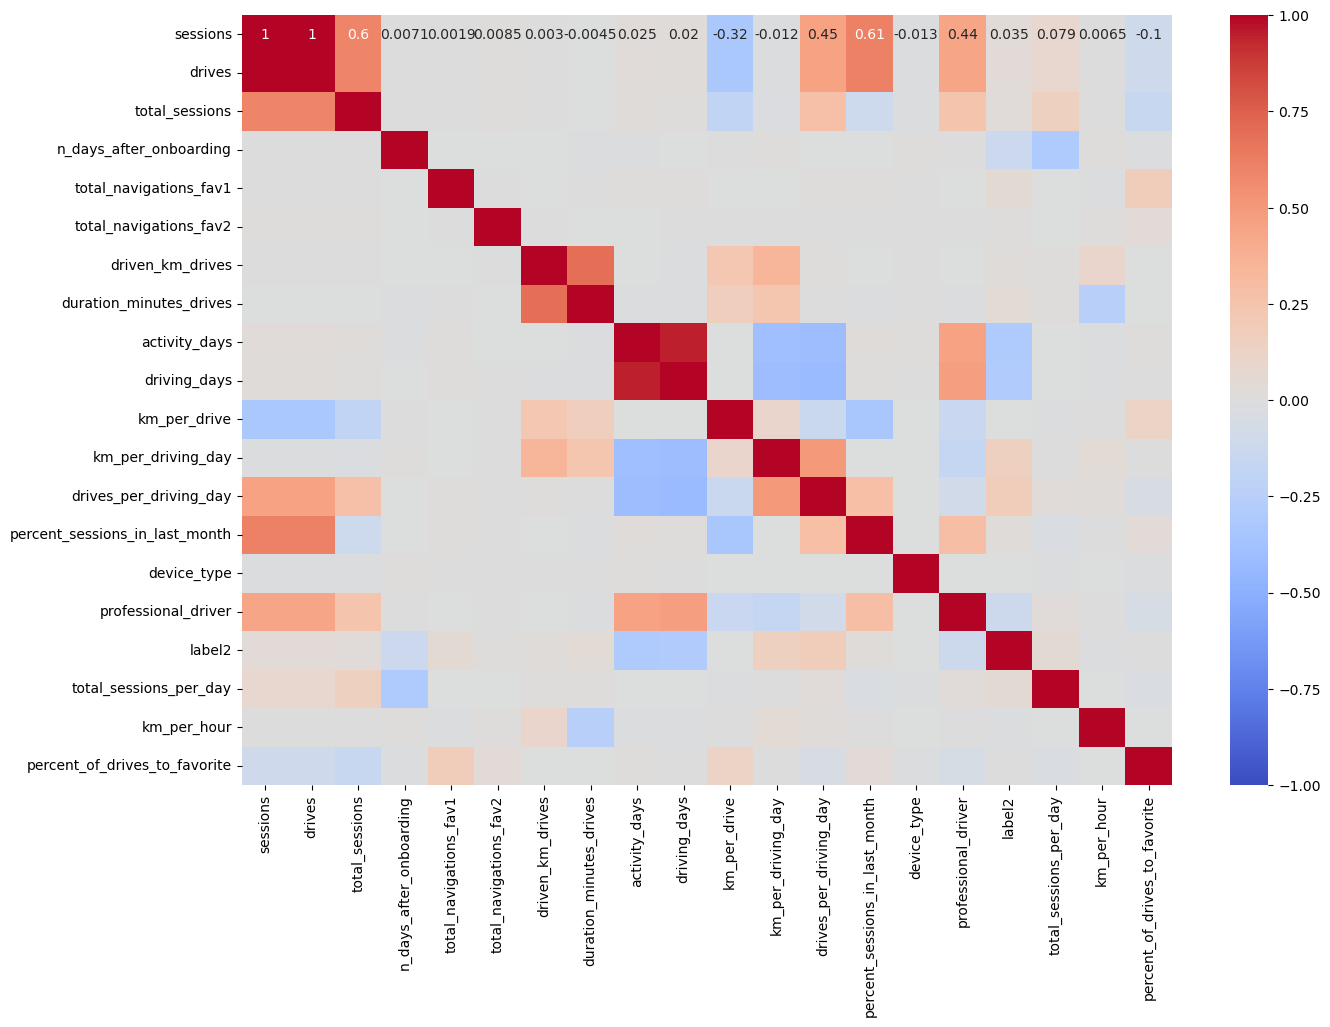

In [127]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(method='pearson'),vmin=-1, vmax=1, annot=True, cmap='coolwarm')

Observation:-

sessions and drives: 1.0

driving_days and activity_days: 0.95

In [129]:
df=df.dropna()

In [130]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,device_type,professional_driver,label2,total_sessions_per_day,km_per_hour,percent_of_drives_to_favorite
count,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.00000,14292.000000,14292.000000,14292.000000,14292.000000,1.429200e+04,14292.000000,1.429200e+04,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000
mean,76.577176,64.045900,183.700090,1751.977120,114.641198,27.18108,3943.778188,1792.708543,15.551147,12.188497,inf,582.227426,inf,0.450057,1.354744,0.174083,0.177302,0.330023,189.459339,1.575383
std,67.238299,55.246631,118.601732,1008.610971,124.614148,36.70953,2217.279739,1224.309116,9.013404,7.831111,NaN,1038.428849,NaN,0.286760,0.478452,0.379194,0.381937,1.292393,327.479240,8.264244
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.00000,60.441250,18.282082,0.000000,0.000000,1.008775e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000298,72.013095,0.000000
25%,23.000000,20.000000,90.466649,878.750000,10.000000,0.00000,2217.278591,839.816701,8.000000,5.000000,3.325052e+01,136.238960,1.800000e+00,0.197506,1.000000,0.000000,0.000000,0.050855,92.889093,0.212419
50%,56.000000,48.000000,158.728448,1749.000000,71.000000,9.00000,3496.214642,1479.201628,16.000000,12.000000,7.487333e+01,273.755019,4.666667e+00,0.424643,1.000000,0.000000,0.000000,0.100482,121.241845,0.647699
75%,112.000000,93.000000,253.564188,2627.250000,178.000000,43.00000,5299.878068,2466.213869,23.000000,19.000000,1.851109e+02,558.596076,1.220000e+01,0.687342,2.000000,0.000000,0.000000,0.208579,191.155537,1.593368
max,243.000000,201.000000,454.363204,3500.000000,424.000000,124.00000,8889.794236,4668.899349,31.000000,30.000000,inf,15420.234110,inf,1.530637,2.000000,1.000000,1.000000,39.763874,21800.540069,671.949672


In [131]:
# 1. Convert infinite values to zero
df.loc[df['drives_per_driving_day']==np.inf, 'drives_per_driving_day'] = 0
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0
# 2. Confirm that it worked
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,device_type,professional_driver,label2,total_sessions_per_day,km_per_hour,percent_of_drives_to_favorite
count,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.00000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000,14292.000000
mean,76.577176,64.045900,183.700090,1751.977120,114.641198,27.18108,3943.778188,1792.708543,15.551147,12.188497,232.382958,582.227426,9.365001,0.450057,1.354744,0.174083,0.177302,0.330023,189.459339,1.575383
std,67.238299,55.246631,118.601732,1008.610971,124.614148,36.70953,2217.279739,1224.309116,9.013404,7.831111,616.326855,1038.428849,19.738651,0.286760,0.478452,0.379194,0.381937,1.292393,327.479240,8.264244
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.00000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000298,72.013095,0.000000
25%,23.000000,20.000000,90.466649,878.750000,10.000000,0.00000,2217.278591,839.816701,8.000000,5.000000,32.560264,136.238960,1.230769,0.197506,1.000000,0.000000,0.000000,0.050855,92.889093,0.212419
50%,56.000000,48.000000,158.728448,1749.000000,71.000000,9.00000,3496.214642,1479.201628,16.000000,12.000000,73.066405,273.755019,3.666667,0.424643,1.000000,0.000000,0.000000,0.100482,121.241845,0.647699
75%,112.000000,93.000000,253.564188,2627.250000,178.000000,43.00000,5299.878068,2466.213869,23.000000,19.000000,179.419080,558.596076,9.000000,0.687342,2.000000,0.000000,0.000000,0.208579,191.155537,1.593368
max,243.000000,201.000000,454.363204,3500.000000,424.000000,124.00000,8889.794236,4668.899349,31.000000,30.000000,15777.426560,15420.234110,395.000000,1.530637,2.000000,1.000000,1.000000,39.763874,21800.540069,671.949672


# Logistic Regression Model Building

In [133]:
# Isolate predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

In [134]:
# Isolate target variable
y = df['label2']

In [135]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [136]:
model = LogisticRegression(penalty='none', max_iter=400)

#It is important to add `penalty = 'none'` since your predictors are unscaled.

model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=400, penalty='none')

Series whose index is the column names and whose values are the coefficients in model.

In [138]:
pd.Series(model.coef_[0], index=X.columns)

drives                            0.002342
total_sessions                    0.000221
n_days_after_onboarding          -0.000404
total_navigations_fav1            0.001221
total_navigations_fav2            0.001157
driven_km_drives                 -0.000030
duration_minutes_drives           0.000117
activity_days                    -0.104747
km_per_drive                      0.000079
km_per_driving_day                0.000030
drives_per_driving_day           -0.000658
percent_sessions_in_last_month   -0.000785
device_type                      -0.002224
professional_driver              -0.001479
total_sessions_per_day            0.000056
km_per_hour                       0.000063
percent_of_drives_to_favorite    -0.005496
dtype: float64

In [139]:
model.intercept_

array([-0.00163596])

In [140]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.69525126, 0.30474874],
       [0.80692499, 0.19307501],
       [0.57090709, 0.42909291],
       ...,
       [0.572794  , 0.427206  ],
       [0.84130602, 0.15869398],
       [0.92720145, 0.07279855]])

In [141]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

### Checking the LOG-ODDS  
The log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear

In [143]:
def regplots(feature_str):
    sns.regplot(x=feature_str, y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
    plt.title(f'Log-odds: {feature_str}');

In [144]:
df

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,...,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,device_type,professional_driver,label2,total_sessions_per_day,km_per_hour,percent_of_drives_to_favorite
0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,...,11.632058,138.360267,11.894737,0.953670,2,1,0,0.130381,79.430298,0.700931
1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,...,128.186173,1246.901868,9.727273,0.406856,1,0,0,0.266854,168.768304,0.253903
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,...,32.201567,382.393602,11.875000,0.841186,2,0,0,0.051121,113.953460,0.000000
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,...,22.839778,304.530374,13.333333,0.724968,1,0,0,4.505948,93.351141,4.867640
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,...,58.091206,219.455667,3.777778,0.499266,2,1,0,0.107713,194.342970,1.016363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,...,52.554489,170.029229,3.235294,0.288634,1,0,0,1.484826,79.330952,1.524950
14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,...,116.073577,203.128760,1.750000,0.223797,2,0,0,0.074918,201.686167,0.133212
14996,retained,243,201,422.017241,1873,17,0,3097.825028,1031.278706,18,...,14.145320,182.225002,12.882353,0.646893,1,1,0,0.225316,180.232076,0.040283
14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,...,33.764655,675.293092,20.000000,0.825374,1,0,1,0.057309,956.401322,0.249274


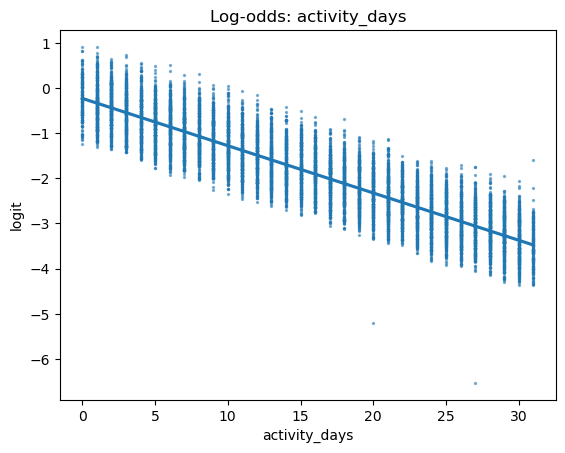

In [145]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

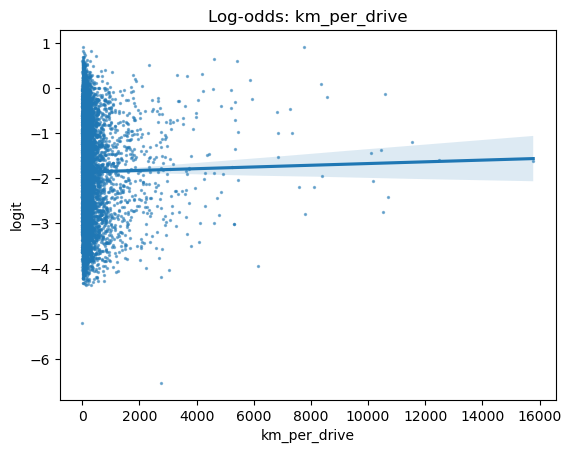

In [146]:
regplots('km_per_drive')

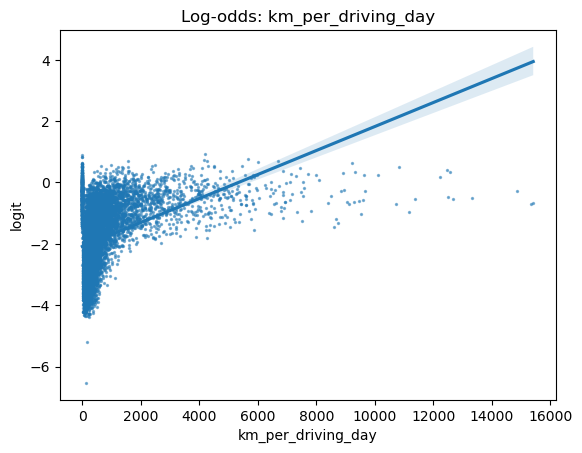

In [147]:
regplots('km_per_driving_day')

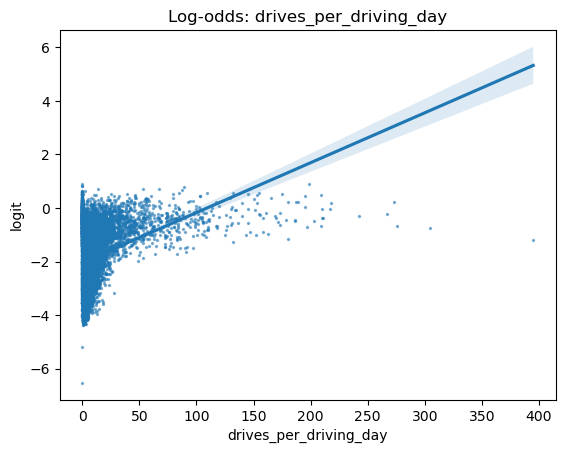

In [148]:
regplots('drives_per_driving_day')

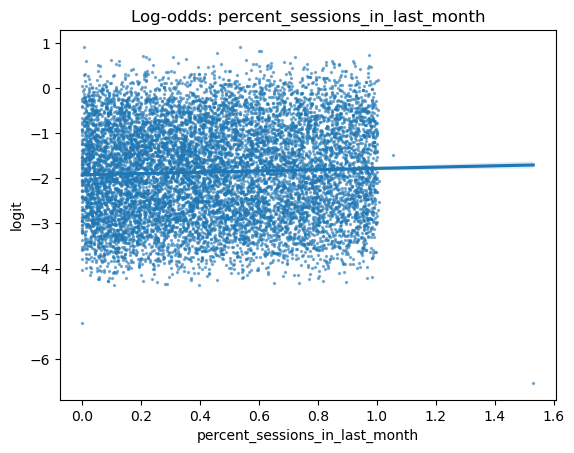

In [149]:
regplots('percent_sessions_in_last_month')

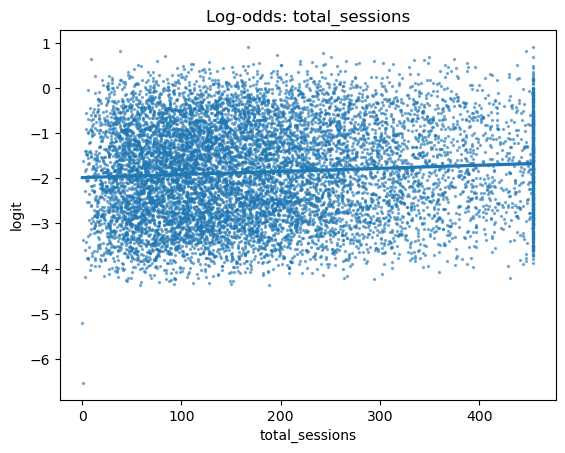

In [150]:
regplots('total_sessions')

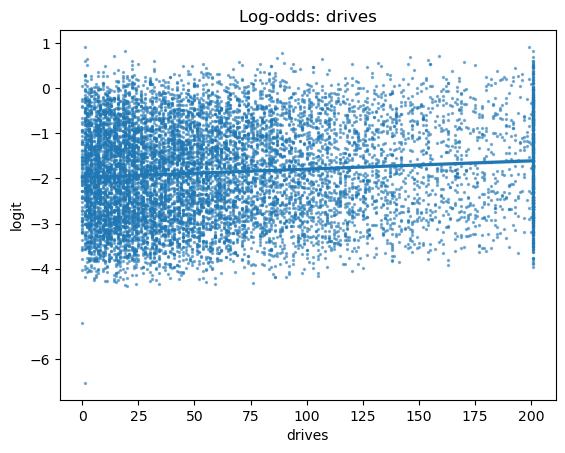

In [151]:
regplots('drives')

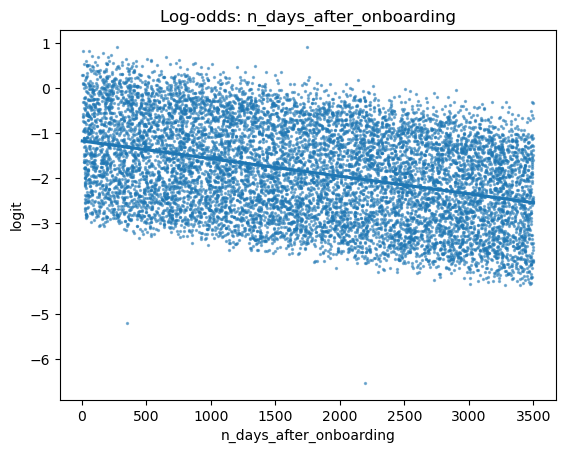

In [152]:
regplots('n_days_after_onboarding')

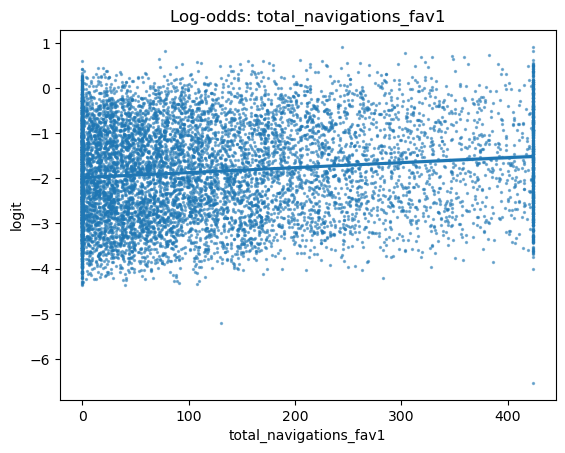

In [153]:
regplots('total_navigations_fav1')

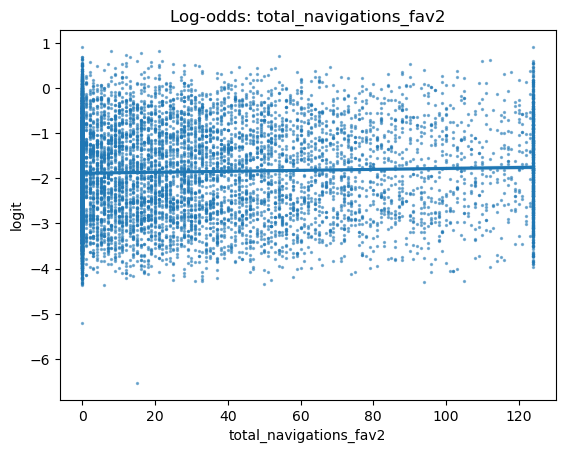

In [154]:
regplots('total_navigations_fav2')

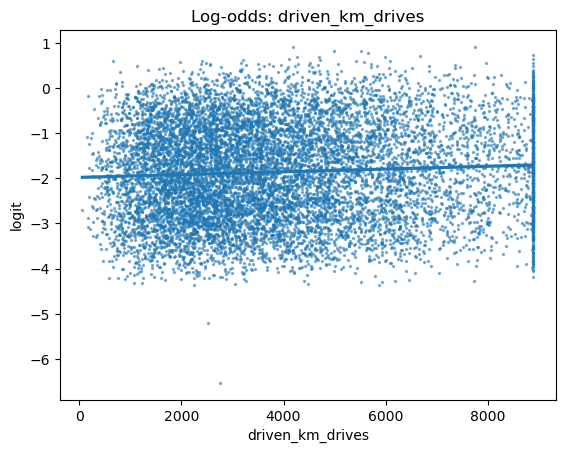

In [155]:
regplots('driven_km_drives')

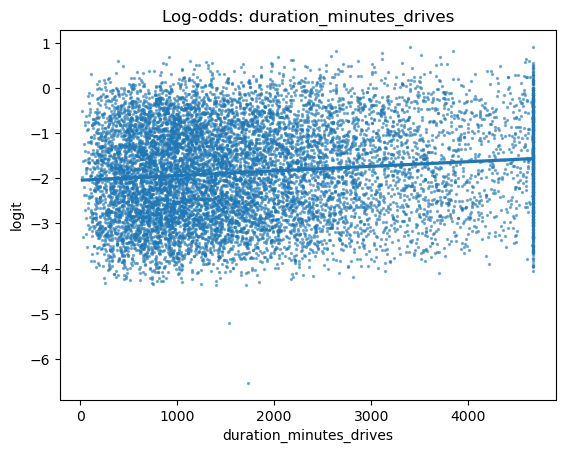

In [156]:
regplots('duration_minutes_drives')

### Results and evaluation

In [158]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

In [159]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8203190596137699

#### Show results with a confusion matrix

In [161]:
cm = confusion_matrix(y_test, y_preds)

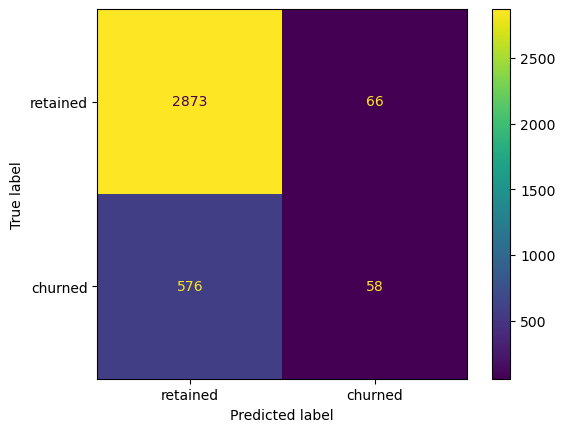

In [162]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

In [163]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2939
     churned       0.47      0.09      0.15       634

    accuracy                           0.82      3573
   macro avg       0.65      0.53      0.53      3573
weighted avg       0.77      0.82      0.77      3573



### The model has a very bad recall value for 'churn', Improving that by changing threshold

In [165]:
# Generate predicted probabilities for the positive class
test_probabilities = model.predict_proba(X_test)[:, 1]

custom_threshold = 0.2

y_preds = (test_probabilities >= custom_threshold).astype(int)

In [166]:
cm = confusion_matrix(y_test, y_preds)

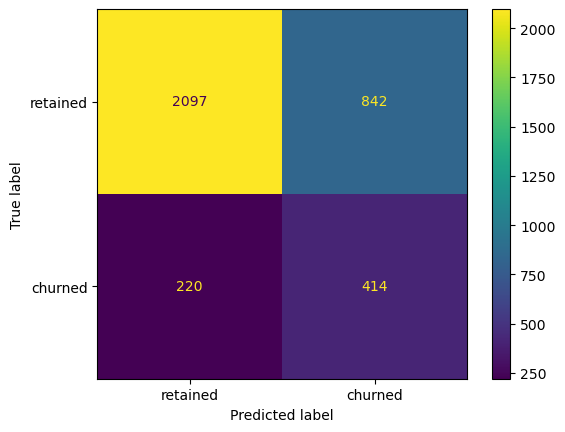

In [167]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

In [168]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.91      0.71      0.80      2939
     churned       0.33      0.65      0.44       634

    accuracy                           0.70      3573
   macro avg       0.62      0.68      0.62      3573
weighted avg       0.80      0.70      0.73      3573



### Feature importance

In [170]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', 0.0023420177564015834),
 ('total_navigations_fav1', 0.0012211716504481969),
 ('total_navigations_fav2', 0.0011573399562932424),
 ('total_sessions', 0.00022098199501689617),
 ('duration_minutes_drives', 0.00011732058858294183),
 ('km_per_drive', 7.881021304786994e-05),
 ('km_per_hour', 6.313140512067193e-05),
 ('total_sessions_per_day', 5.563682214450897e-05),
 ('km_per_driving_day', 2.9608155837881955e-05),
 ('driven_km_drives', -3.0411373002641677e-05),
 ('n_days_after_onboarding', -0.0004042015340698881),
 ('drives_per_driving_day', -0.0006584772649024813),
 ('percent_sessions_in_last_month', -0.0007848123587157563),
 ('professional_driver', -0.0014791626935138022),
 ('device_type', -0.0022239307183906753),
 ('percent_of_drives_to_favorite', -0.005495509340594821),
 ('activity_days', -0.10474678528046735)]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


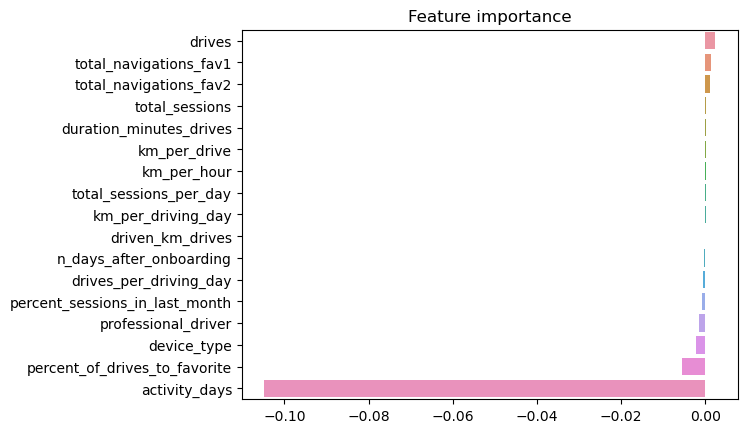

In [171]:
# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

### Dropping features with coef. closer to 0 to Train the model

In [173]:
# Isolate predictor variables
X = df[['activity_days','device_type','professional_driver','drives','total_navigations_fav1',\
        'total_navigations_fav2','percent_sessions_in_last_month','drives_per_driving_day',\
        'total_sessions','duration_minutes_drives','n_days_after_onboarding']]

# Isolate target variable
y = df['label2']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = LogisticRegression(penalty='none', max_iter=400)

#It is important to add `penalty = 'none'` since your predictors are unscaled.

model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=400, penalty='none')

In [174]:
pd.Series(model.coef_[0], index=X.columns)

activity_days                    -0.105581
device_type                      -0.002493
professional_driver              -0.001326
drives                            0.001873
total_navigations_fav1            0.001164
total_navigations_fav2            0.001112
percent_sessions_in_last_month   -0.000872
drives_per_driving_day            0.000218
total_sessions                    0.000266
duration_minutes_drives           0.000090
n_days_after_onboarding          -0.000402
dtype: float64

In [175]:
model.intercept_

array([-0.00183342])

In [176]:
# Generate predicted probabilities for the positive class
test_probabilities = model.predict_proba(X_test)[:, 1]

custom_threshold = 0.2

y_preds = (test_probabilities >= custom_threshold).astype(int)

In [177]:
cm = confusion_matrix(y_test, y_preds)

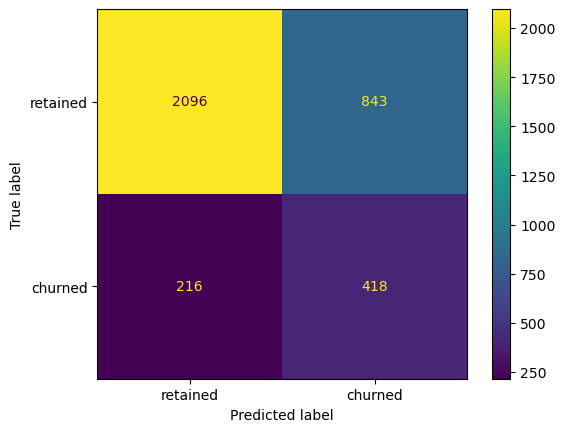

In [178]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

In [179]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.91      0.71      0.80      2939
     churned       0.33      0.66      0.44       634

    accuracy                           0.70      3573
   macro avg       0.62      0.69      0.62      3573
weighted avg       0.80      0.70      0.73      3573



The model is not a strong enough predictor, as made clear by its poor recall score. However, if the model is only being used to guide further exploratory efforts, then it can have value.It could also be helpful to scale the predictor variables, and/or to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features.

# Machine Learning Model(Tree-based modeling)

Machine learning model to predict user churn

#### Random Forest Model

In [184]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

pd.set_option('display.max_columns', None)

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

In [185]:
df

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,device_type,professional_driver,label2,total_sessions_per_day,km_per_hour,percent_of_drives_to_favorite
0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.953670,2,1,0,0.130381,79.430298,0.700931
1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.406856,1,0,0,0.266854,168.768304,0.253903
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.841186,2,0,0,0.051121,113.953460,0.000000
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,0.724968,1,0,0,4.505948,93.351141,4.867640
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,0.499266,2,1,0,0.107713,194.342970,1.016363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,52.554489,170.029229,3.235294,0.288634,1,0,0,1.484826,79.330952,1.524950
14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,116.073577,203.128760,1.750000,0.223797,2,0,0,0.074918,201.686167,0.133212
14996,retained,243,201,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,14.145320,182.225002,12.882353,0.646893,1,1,0,0.225316,180.232076,0.040283
14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,33.764655,675.293092,20.000000,0.825374,1,0,1,0.057309,956.401322,0.249274


In [186]:
X = df.drop(columns=['label', 'label2', 'device'])


y = df['label2']


X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

In [187]:
rf = RandomForestClassifier(random_state=42)

cv_params = {'max_depth':[None],
             'max_features': [1.0],
             'max_samples': [1.0,],
             'min_samples_leaf': [3],
             'min_samples_split': [2],
             'n_estimators': [300],   
            }

scoring = ['accuracy', 'precision', 'recall', 'f1']

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [188]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 1min 13s, sys: 459 ms, total: 1min 13s
Wall time: 1min 14s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [3],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [189]:
rf1.best_score_

0.11907894736842106

In [190]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [191]:
def results(model_name:str, model_object):
# Convert cv_results_ to a DataFrame for easier manipulation
    cv_results = pd.DataFrame(model_object.cv_results_)
    cv_results
    # Find the index of the best model based on the refit metric
    best_index = model_object.best_index_
    
    # Extract metrics for the best model
    precision = cv_results.loc[best_index, 'mean_test_precision']
    recall = cv_results.loc[best_index, 'mean_test_recall']
    f1 = cv_results.loc[best_index, 'mean_test_f1']
    accuracy = cv_results.loc[best_index, 'mean_test_accuracy']
    
    # Print the metrics
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          })
    return table

In [192]:
result=results('Random Forest CV',rf1)
result

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.447536,0.119079,0.187866,0.817472


Asside from the accuracy, the scores aren't that good. However, recall that when you built the logistic regression model in the last course the recall was \~0.09, which means that this model has 33% better recall and about the same accuracy.

#### XGBoost

In [195]:
xgb = XGBClassifier(random_state=42)

cv_params = {'max_depth':[6,12],
             'n_estimators': [300],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [196]:
xgb1.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [197]:
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 5,
 'n_estimators': 300}

In [198]:
xgb1.best_score_

0.16578947368421051

In [199]:
xgb_results = results('XGBoost cv', xgb1)
result = pd.concat([result, xgb_results], axis=0)
result

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.447536,0.119079,0.187866,0.817472
0,XGBoost cv,0.403832,0.165789,0.234732,0.808725


This model fit the data even better than the random forest model. The recall score is nearly double the recall score from the logistic regression model from the previous course, and it's almost 50% better than the random forest model's recall score, while maintaining a similar accuracy and precision score.

### Model selection

#### Random forest

In [203]:
# Use random forest model to predict on validation data
rf_val_preds = rf1.best_estimator_.predict(X_val)

In [204]:
def get_test_scores(model_name:str, preds, y_test_data):
    
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [205]:
# Getting validation scores for RF model
rf_val_scores = get_test_scores('Random Forest Val', rf_val_preds, y_val)

# Appending to the results table
result = pd.concat([result, rf_val_scores], axis=0)
result

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.447536,0.119079,0.187866,0.817472
0,XGBoost cv,0.403832,0.165789,0.234732,0.808725
0,Random Forest Val,0.445312,0.112426,0.179528,0.817768


The scores went down from the training scores across all metrics, but only by very little. This means that the model did not overfit the training data.

#### XGBoost

In [208]:
# Use random forest model to predict on validation data
xgb_val_preds = xgb1.best_estimator_.predict(X_val)

In [209]:
# Getting validation scores for RF model
xgb_val_scores = get_test_scores('XGBoost Val', xgb_val_preds, y_val)

# Appending to the results table
result = pd.concat([result, xgb_val_scores], axis=0)
result

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.447536,0.119079,0.187866,0.817472
0,XGBoost cv,0.403832,0.165789,0.234732,0.808725
0,Random Forest Val,0.445312,0.112426,0.179528,0.817768
0,XGBoost Val,0.427083,0.161736,0.234621,0.812872


Just like with the random forest model, the XGBoost model's validation scores were lower, but only very slightly. It is still the clear champion on the basis of recall metric.

### Using the champion model to predict on test data

In [212]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb1.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
result = pd.concat([result, xgb_test_scores], axis=0)
result

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.447536,0.119079,0.187866,0.817472
0,XGBoost cv,0.403832,0.165789,0.234732,0.808725
0,Random Forest Val,0.445312,0.112426,0.179528,0.817768
0,XGBoost Val,0.427083,0.161736,0.234621,0.812872
0,XGB test,0.398058,0.161736,0.230014,0.807975


### Confusion matrix

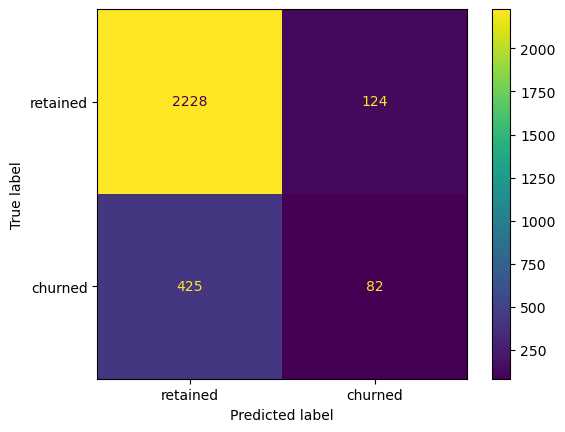

In [214]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot();

### Feature importance

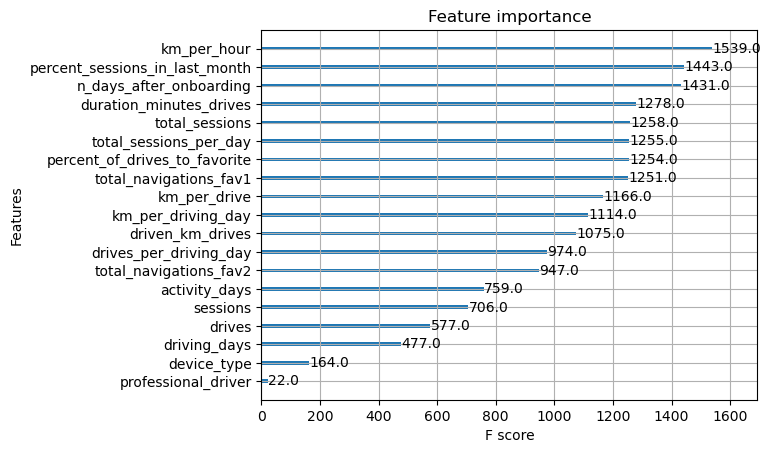

In [216]:
plot_importance(xgb1.best_estimator_);

The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (`activity_days`) very heavily in its final prediction.

#### Identify an optimal decision threshold

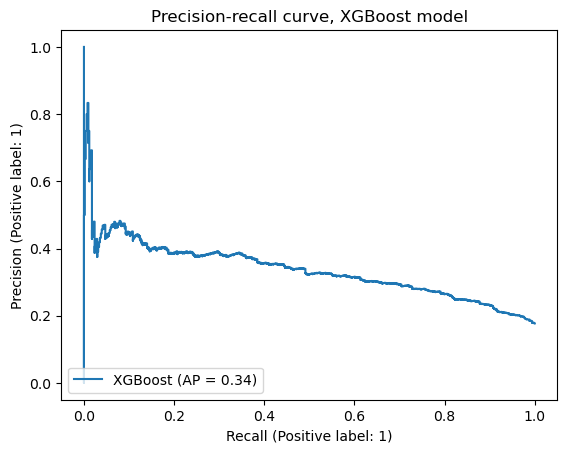

In [219]:
# Plot precision-recall curve
display = PrecisionRecallDisplay.from_estimator(
    xgb1.best_estimator_, X_test, y_test, name='XGBoost'
    )
plt.title('Precision-recall curve, XGBoost model');

As recall increases, precision decreases. But false positives aren't much of a problem. In this case, a false positive could just mean that a user who will not actually churn gets an email and a banner notification on their phone. It's very low risk.

In [221]:
def threshold_finder(y_test_data, probabilities, desired_recall):
    # Extract the probabilities for the positive class
    probs = np.array([x[1] for x in probabilities])

    # Define thresholds to evaluate
    thresholds = np.arange(0, 1, 0.001)

    # Compute recall scores for all thresholds
    recalls = [recall_score(y_test_data, probs >= threshold) for threshold in thresholds]

    # Find the index of the recall closest to the desired recall
    best_idx = np.argmin(np.abs(np.array(recalls) - desired_recall))

    # Get the best threshold and corresponding recall
    best_threshold = thresholds[best_idx]
    best_recall = recalls[best_idx]

    return best_threshold, best_recall

In [222]:
probabilities = xgb1.best_estimator_.predict_proba(X_test)
threshold_finder(y_test,probabilities,0.51)

(0.152, 0.5088757396449705)

Setting a **threshold** of **0.152** will result in a **recall** of **0.50**.